# Information on critical path

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=15)
plt.rcParams["figure.figsize"] = (9,6)

### Package name | App name

| Packege | App |
| --- | --- |
|com.abtnprojects.ambatana | Letgo|
|bbc.mobile.news.uk | BBC News|
|com.amazon.mShop.android.shopping | Amazon shopping|
|com.cnn.mobile.android.phone | CNN News|
|com.google.android.apps.maps | Google Maps|
|com.google.android.youtube | Youtube|
|com.microsoft.office.outlook | Microsoft Outlook|
|com.particlenews.newsbreak | NewsBreak|
|com.soundcloud.android | SoundCloud|
|com.spotify.music | Spotify|
|com.ubercab | Uber|
|com.facebook.katana | Facebook|
|com.facebook.orca | Messenger|
|com.twitter.android | Twitter|
|com.snapchat.android | SnapChat|
|com.instagram.android | Instagram|
|com.google.android.gm | Gmail|
|com.whatsapp | WhatsApp|

## Load dataset

In [133]:
## Critical flows / domains
df_startup = pd.read_csv("./critical_path_flows_domains_app-startup.txt", sep= ' ')
df_click = pd.read_csv("./critical_path_flows_domains_app-click.txt", sep= ' ')

## Critical path timebreak
df_tb_startup = pd.read_csv("./critical_path_timebreak_app-startup.txt", sep=' ')[['Application', 'DNS', 'TCP', 'TLS', 'Data']]
df_tb_click =  pd.read_csv("./critical_path_timebreak_app-click.txt", sep=' ')

## Select app

App = com.facebook.katana
#Critical_flows = 4 (57.142857 percent)
#Critical_domains = 3 (50.000000 percent)

Critical Path Time-Break (Case = APP-STARTUP)
Dns = 1.234184 percent
Handshakes = 6.129772 percent
Data = 92.636044 percent


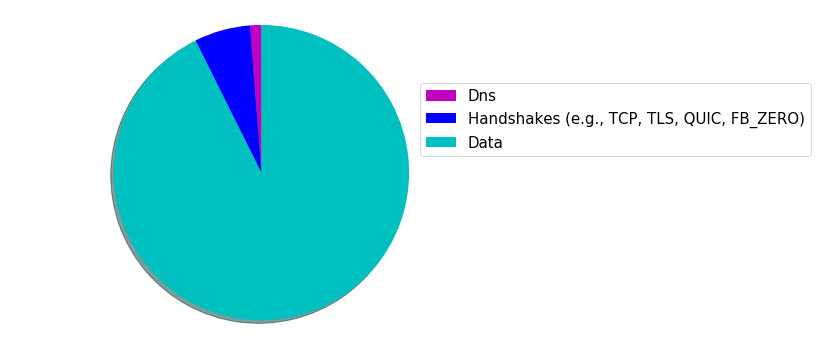


Critical Path Time-Break (Case = APP-CLICK)
Dns = 6.164545 percent
Handshakes = 10.380940 percent
Data = 83.454516 percent


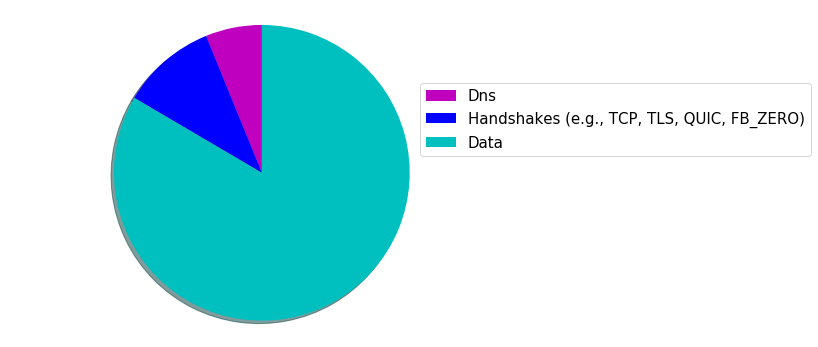

In [151]:
APP = "com.facebook.katana"

show_info(APP)

## utils/plotting

In [150]:
def pie_chart_cp(df, APP):    
    labels = ['Dns', 'Handshakes (e.g., TCP, TLS, QUIC, FB_ZERO)', 'Data']
    df_app = df[df['Application']==APP].mean()
    tbreak = [df_app['DNS'], df_app['TCP']+df_app['TLS'], df_app['Data']]
    print("Dns = %f percent\nHandshakes = %f percent\nData = %f percent" %(100*tbreak[0], 100*tbreak[1], 100*tbreak[2]))
    patches, texts = plt.pie(tbreak, colors=['m', 'blue', 'c'], shadow=True, startangle=90)
    plt.legend(patches, labels, bbox_to_anchor=[0.8,0.8])
    plt.axis('equal')
    plt.show()

    
def show_info(APP):
    ##flows/domains info
    nflows = df_startup[df_startup['App']==APP]['#Flows'].values[0]
    ndomains = df_startup[df_startup['App']==APP]['#Domains'].values[0]
    nflows_cp = df_startup[df_startup['App']==APP]['#Critical_flows'].values[0]
    ndomains_cp = df_startup[df_startup['App']==APP]['#Critical_domains'].values[0]
    print("App = %s\n#Critical_flows = %d (%f percent)\n#Critical_domains = %d (%f percent)" % 
          (APP, nflows_cp, nflows_cp/float(nflows*1e-2), ndomains_cp, ndomains_cp/float(ndomains*1e-2)))
    
    ##timebreak
    print("\nCritical Path Time-Break (Case = APP-STARTUP)")
    pie_chart_cp(df_tb_startup, APP)
    print("\nCritical Path Time-Break (Case = APP-CLICK)")
    pie_chart_cp(df_tb_click, APP)
    